In [1]:
import cv2
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
#Script para leer y procesar imagen
sys.path.insert(0, '../Golden Master (AS IS)')
import readImage as rI
sys.path.insert(0, '../Workflow de Pruebas (AS IS)')
import processing    

In [2]:
#Lee excel con errores por subexposición
casos_error_excel = pd.ExcelFile("../../Casos/erroresCapturaEjemplos.xlsx")
casos_error_df = casos_error_excel.parse('Hoja1')
#Lee lista de imágenes borrosas
subexpuestas = casos_error_df[['QR','Contador']][casos_error_df['Subexposición']==1]
subexpuestas.head()

,QR,Contador
3,601170500100018,2
4,601170500100018,1
5,699170600100012,0
6,601170500100375,2
7,601170500100347,9


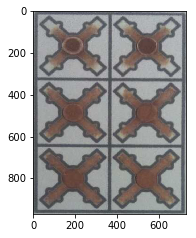

In [3]:
#Lee imagen con subexposición
row = subexpuestas.iloc[12]
row.QR = '100160700100001'
img = rI.readImage(str(row.QR), count = int(row.Contador), local = False)

## Recorta X-Marker Group
inputBS = img
outputBS = processing.biggestSquare(inputBS)
inputXG = outputBS
outputXG = processing.findXMGroup(inputXG)
    
#Muestra imagen recortada
plt.subplot(121),plt.imshow(cv2.cvtColor(outputXG,cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
print(row.count)

<bound method Series.count of QR          100160700100001
Contador                  1
Name: 15, dtype: int64>


In [5]:
#Transformación de BGR a YUV
img_yuv = cv2.cvtColor(outputXG, cv2.COLOR_BGR2YUV)
img_yuv_copy = img_yuv.copy()

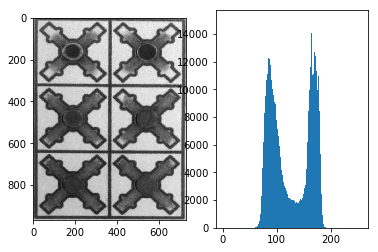

In [6]:
#Grafica Imagen YUV vs Histograma
plt.subplot(121),plt.imshow(img_yuv[:,:,0],'gray')
plt.subplot(122),plt.hist(img_yuv[:,:,0].ravel(),256,[0,256])
plt.show()

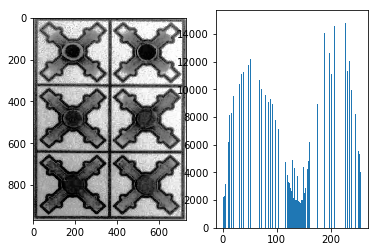

In [7]:
#Global Histogram Equalization

# Ecualiza Histograma del canal y
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

plt.subplot(121),plt.imshow(img_yuv[:,:,0],'gray')
plt.subplot(122),plt.hist(img_yuv[:,:,0].ravel(),256,[0,256])
plt.show()

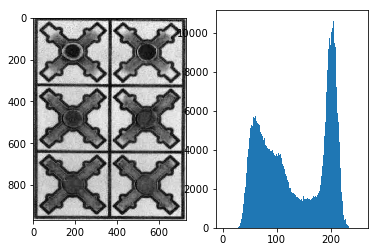

In [8]:
#CLAHE Histogram Equalization

# Crea Objeto CLAHE(Argumentos opcionales).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Ecualiza Histograma del canal Y
img_yuv_copy[:,:,0] = clahe.apply(img_yuv_copy[:,:,0])

plt.subplot(121),plt.imshow(img_yuv_copy[:,:,0],'gray')
plt.subplot(122),plt.hist(img_yuv_copy[:,:,0].ravel(),256,[0,256])
plt.show()

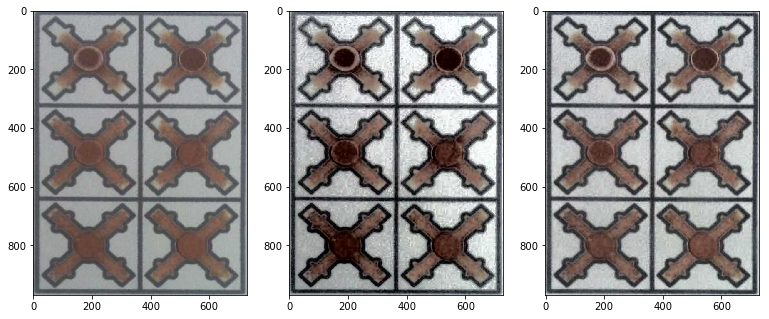

In [9]:
#Transformación YUV a RGB. Original vs General vs CLAHE

# General Equalization YUV a BGR
general_bgr = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# CLAHE Equalization YUV a BGR
clahe_bgr = cv2.cvtColor(img_yuv_copy, cv2.COLOR_YUV2BGR)

width = 13
height = 13
plt.figure(figsize=(width, height))
plt.subplot(131),plt.imshow(cv2.cvtColor(outputXG,cv2.COLOR_BGR2RGB))
plt.subplot(132),plt.imshow(cv2.cvtColor(general_bgr,cv2.COLOR_BGR2RGB))
plt.subplot(133),plt.imshow(cv2.cvtColor(clahe_bgr,cv2.COLOR_BGR2RGB))
plt.show()